# ADVANCES IN DATA SCIENCE AND ARCHITECTURE

## ASSIGNMENT 1 - ML MODELS
  
  By: Gauri Verma 
  
  NUID: 001306996




**Abstract**

The aim in this assignment is to predict classification by income.The prediction task is to determine whether a person makes over $50K a year.This data used was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker.

General View of the Data

Categorical Variables
* sex
* race
* income
* workclass
* education
* occupation
* relationship
* marital-status
* native-country

Continuous Variables
* age
* fnlwgt
* capital-loss
* capital-gain
* education-num
* hours-per-week



In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn import metrics
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#reading the data

url = "https://raw.githubusercontent.com/gauriverma19/Advance-Data-Science/master/adult.csv"
df = pd.read_csv(url)


In [3]:
#seeing the data and its basic stats

print(df.head(20))
print(df.describe())

    age         workclass  fnlwgt     education  education.num marital.status  \
0    90                 ?   77053       HS-grad              9        Widowed   
1    82           Private  132870       HS-grad              9        Widowed   
2    66                 ?  186061  Some-college             10        Widowed   
3    54           Private  140359       7th-8th              4       Divorced   
4    41           Private  264663  Some-college             10      Separated   
5    34           Private  216864       HS-grad              9       Divorced   
6    38           Private  150601          10th              6      Separated   
7    74         State-gov   88638     Doctorate             16  Never-married   
8    68       Federal-gov  422013       HS-grad              9       Divorced   
9    41           Private   70037  Some-college             10  Never-married   
10   45           Private  172274     Doctorate             16       Divorced   
11   38  Self-emp-not-inc  1

Independent Variables:

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st- 4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF- spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed- Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country : United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Dependent Variable:
* Salary : <=50K and >50K

In [4]:
#gathering info of all the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#Separating the categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [6]:
#num_col

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

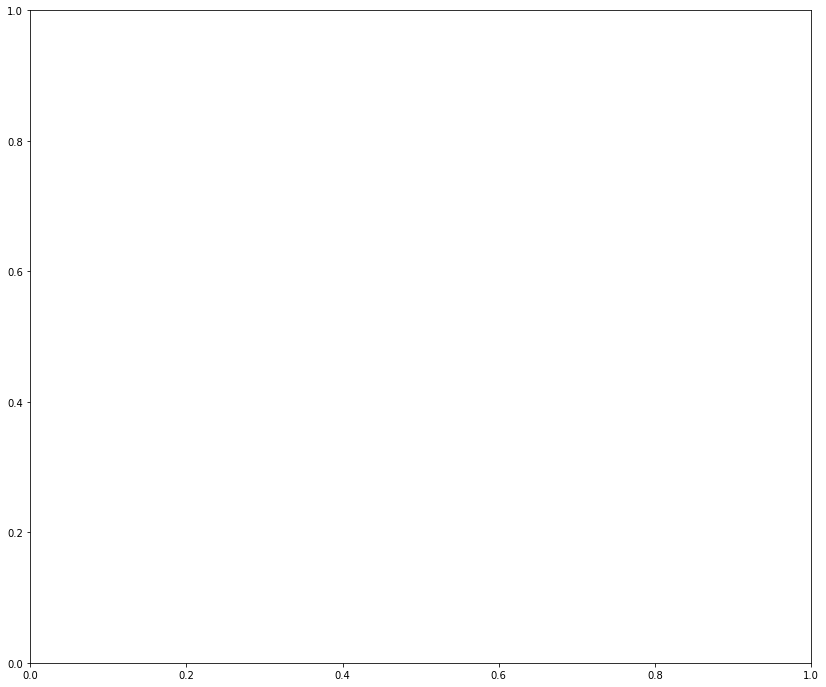

In [7]:
#generating the correlation heatmap of dataset using the numerical columns

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df[list(num_col.index)])

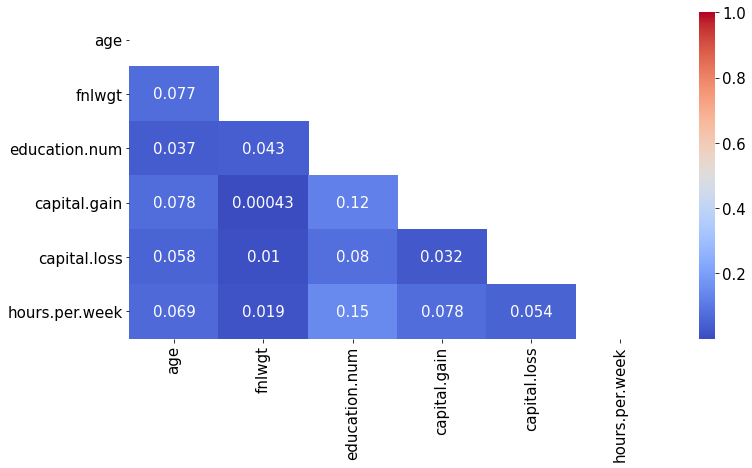

In [8]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 15})
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask) 

C:\Users\19293\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


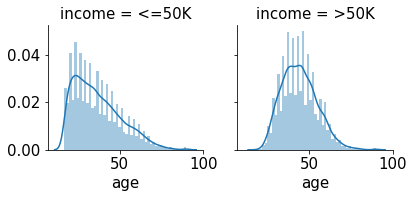

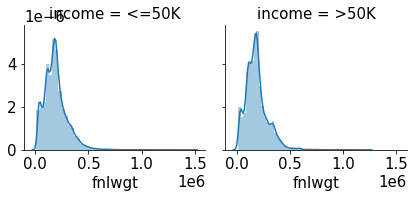

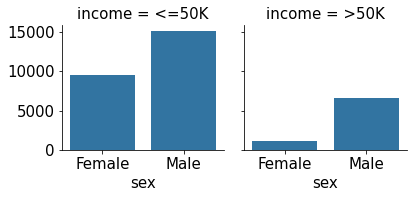

In [9]:
#Facet grids for distribution and countplot
g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "age")

g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "fnlwgt")

g = sns.FacetGrid(df, col='income')
g = g.map(sns.countplot, "sex")
plt.show()

<Figure size 864x720 with 0 Axes>

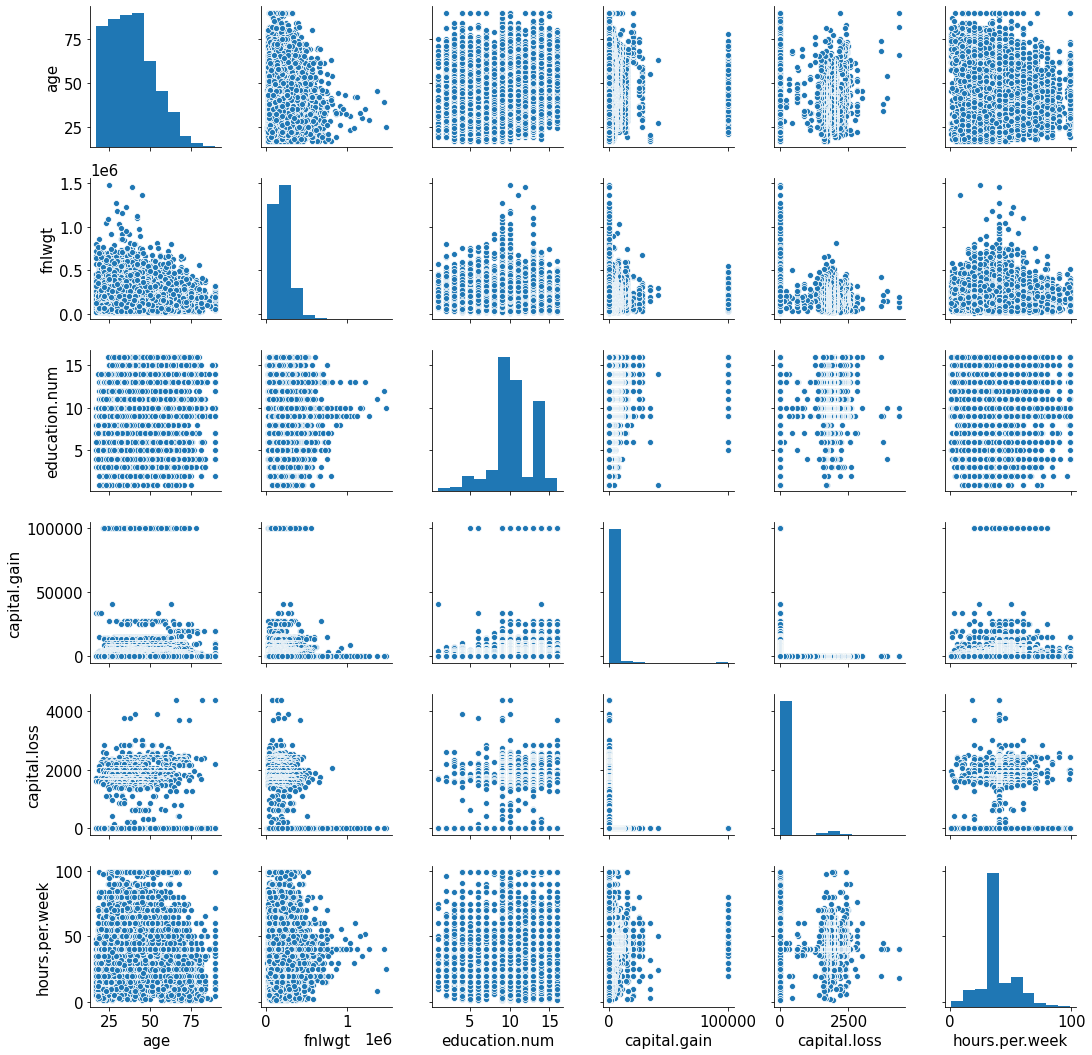

In [10]:
#pair plots of all features
plt.figure(figsize=(12,10))
sns.pairplot(df)

In [11]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


From the inferences and plots above, we can conclude that:

* education.num and hours.per.week are highly correlated
* education.num and capital.gain are highly correlated
* education.num and capital.loss are highly correlated
* capital.gain and hours.per.week are moderately correlated
* age and capita.gain are moderately correlated
* age and hours.per.week are moderately correlated
* fnlwgt and age are moderately correlated

In [10]:
#checking for missing values and their attributes

col_names = df.columns
num_data = df.shape[0]
print("Description about the attributes containing number of missing values\n")
for c in col_names:
    # print(df[c])
    num_non = df[c].isin(["?"]).sum()
    # print(num_non)
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")


Description about the attributes containing number of missing values

workclass
1836
5.64%


occupation
1843
5.66%


native.country
583
1.79%




In [11]:
#handling missing values
col_names = df.columns
for c in col_names:
	df[c] = df[c].replace("?", np.NaN)

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [12]:
print(df.isnull().sum())
print(df.describe())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.00000

In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [14]:
#encoding the categorial variables

category_col =['workclass', 'race', 'education','marital.status', 'occupation',
               'relationship', 'sex', 'native.country', 'income'] 


labelEncoder = preprocessing.LabelEncoder()
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])


**FINDING FEATURE SCORES AND FEATURE IMPORTANCE ALONG WITH T-STATISTICS**

For finding the scores of the features, using the selectKBest and chi2 libraries to extract the 10 best features

In [15]:
#using selectkbest and chi2 to check for best score features

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df
X = data.iloc[:,0:14]  #independent columns
y = data.iloc[:,14]    #target column i.e income
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs         Score
10    capital.gain  8.219247e+07
11    capital.loss  1.372146e+06
2           fnlwgt  1.711477e+05
0              age  8.600612e+03
12  hours.per.week  6.476409e+03
7     relationship  3.659143e+03
4    education.num  2.401422e+03
5   marital.status  1.123470e+03
9              sex  5.024394e+02
3        education  2.979423e+02


C:\Users\19293\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.15116539 0.04478848 0.1676941  0.0379248  0.08130087 0.0819828
 0.07277812 0.0843697  0.01543125 0.02963324 0.09268074 0.02954144
 0.09588471 0.01482436]


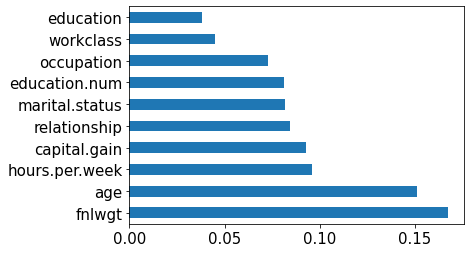

In [16]:
#using TreeClassifier to check for feature importance

import pandas as pd
import numpy as np
data = df
X = data.iloc[:,0:14]  #independent columns
y = data.iloc[:,14]    #target column i.e income
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


Based on the above visuals, we can conclude that age and fnlwgt have great importance towards the predictions whereas race and native.country have low importance.

In [17]:
#Using OLS for finding the p value and t statistics 
import statsmodels.api as sm

model = sm.OLS(y,X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 income   R-squared (uncentered):                   0.429
Model:                            OLS   Adj. R-squared (uncentered):              0.429
Method:                 Least Squares   F-statistic:                              1750.
Date:                Fri, 02 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:32:32   Log-Likelihood:                         -13887.
No. Observations:               32561   AIC:                                  2.780e+04
Df Residuals:                   32547   BIC:                                  2.792e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0032      0.000     21.290      0.000       0.003       0.003
workclass         -0.0215      0.002    -11.836      0.000      -0.025      -0.018
fnlwgt         -5.265e-08    1.9e-08     -2.768      0.006   -8.99e-08   -1.54e-08
education         -0.0054      0.001     -9.553      0.000      -0.007      -0.004
education.num      0.0422      0.001     49.358      0.000       0.041       0.044
marital.status    -0.0349      0.001    -25.346      0.000      -0.038      -0.032
occupation        -0.0010      0.001     -1.937      0.053      -0.002    1.17e-05
relationship      -0.0297      0.002    -19.096      0.000      -0.033      -0.027
race              -0.0053      0.002     -2.275      0.023      -0.010      -0.001
sex                0.0761      0.005     14.291      0.000       0.066       0.087
capital.gain    9.806e-06   2.81e-07     34.844      0.000    9.25e-06    1.04e-05
capital.loss       0.0001   5.13e-06     22.888      0.000       0.000       0.000
hours.per.week     0.0023      0.000     13.471      0.000       0.002       0.003
native.country    -0.0048      0.000    -16.024      0.000      -0.005      -0.004
==============================================================================
Omnibus:                     3251.818   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4197.337
Skew:                           0.868   Prob(JB):                         0.00
Kurtosis:                       2.712   Cond. No.                     5.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the p-values with a significance of 0.05 we can conclude the following:



* Age has p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* workclass has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* fnlwgt has the p-value 0.006, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* education has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* education.num has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* marital.status has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* occupation has the p-value 0.053, which is greater and this provides less evidence against the null hypothesis and it is not a significant feature.
* relationship has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* race has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* sex has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* capital.gain has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* capital.loss has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* hours.per.week has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
* native.country has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

In [18]:
#Deleting the unnecessary attributes

#education and education.num have similar significance

df.drop(["workclass","education","occupation", "race", "native.country"], axis = 1, inplace = True)
df.head()

,age,fnlwgt,education.num,marital.status,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,6,1,0,0,4356,40,0
1,82,132870,9,6,1,0,0,4356,18,0
2,66,186061,10,6,4,0,0,4356,40,0
3,54,140359,4,0,4,0,0,3900,40,0
4,41,264663,10,5,3,0,0,3900,40,0


**Train Test Split**

---
Splitting the cleaned data into training and testing sets.

Test Size = 30% 
Train Size = 70%

random_state variable is a pseudo-random number generator state used for random sampling.



In [21]:
X = df.values[:, 0:9]
Y = df.values[:,9]

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.8,test_size=0.2, random_state=101)

In [22]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

train_errors = []
valid_errors = []
param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50,75,100]

for max_depth in param_range:
    random_forest = RandomForestRegressor(max_depth=max_depth, n_estimators=100, random_state=1)
    random_forest.fit(X_train, y_train)
    
    train_errors.append(np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train))))
    valid_errors.append(np.sqrt(mean_squared_error(y_valid, random_forest.predict(X_valid))))
    

plt.xlabel('max_depth')
plt.ylabel('root mean_squared_error')
plt.plot(param_range, train_errors, label="train rmse")
plt.plot(param_range, valid_errors, label="validation rmse")
plt.legend()
plt.show()

KeyboardInterrupt: 

In [19]:
#splitting into training and testing data for model execution

X = df.values[:, 0:9]
Y = df.values[:,9]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

**MODEL 1 -DECISION TREE**

Performing Decision Tree Classification.

 Building the classifier using both gini index and information gain(Entropy).



In [20]:
### Desicion Tree with Gini Index 

dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
dt_clf_gini.fit(X_train, y_train)

### Desicion Tree with Information Gain 

dt_clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=5, min_samples_leaf=5)

dt_clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

Predicting the data on gini and entropy classifier using test data


In [21]:
y_pred_gini = dt_clf_gini.predict(X_test)
y_pred_en = dt_clf_entropy.predict(X_test)

**Calculating the accuracy and precision of the model using GINI INDEX**

In [22]:
print ("Desicion Tree using Gini Index\n Accuracy of the model is ", accuracy_score(y_test,y_pred_gini)*100,"\n\nPrecision Value of the model is\n",
metrics.classification_report(y_test,y_pred_gini))

Desicion Tree using Gini Index
 Accuracy of the model is  85.60753403623707 

Precision Value of the model is
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7441
           1       0.79      0.55      0.64      2328

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



**Calculating the accuracy and precision of the model using INFORMATION GAIN**

In [23]:
print ("Desicion Tree using Information Gain\nAccuracy is ", accuracy_score(y_test,y_pred_en)*100,"\n\nPrecision Value is\n",
metrics.classification_report(y_test,y_pred_en))

Desicion Tree using Information Gain
Accuracy is  85.43351417750026 

Precision Value is
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7441
           1       0.78      0.54      0.64      2328

    accuracy                           0.85      9769
   macro avg       0.82      0.75      0.77      9769
weighted avg       0.85      0.85      0.84      9769



**Confusion Matrix for Decision Tree Model**

[[7094  347]
 [1059 1269]]
[[7078  363]
 [1060 1268]]


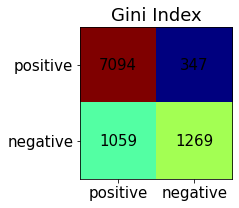

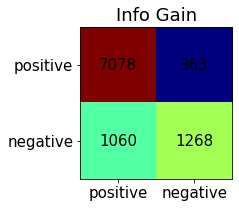

In [24]:
#confusion matrix for the above models

conf_arr_gini =confusion_matrix(y_test,y_pred_gini)
conf_arr_en =confusion_matrix(y_test,y_pred_en)

print(conf_arr_gini)
print(conf_arr_en)

norm_conf = []
for i in conf_arr_gini:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr_gini.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr_gini[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Gini Index")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

norm_conf_1 = []
for i in conf_arr_en:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf_1.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax1 = fig.add_subplot(1,2,2)
ax1.set_aspect(1)
res = ax1.imshow(np.array(norm_conf_1), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr_en.shape

for x in range(width):
    for y in range(height):
        ax1.annotate(str(conf_arr_en[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Info Gain")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

**ROC and AUC Curve**

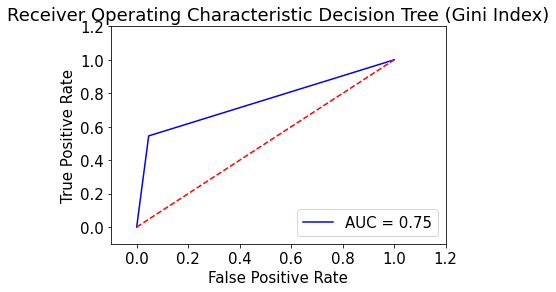

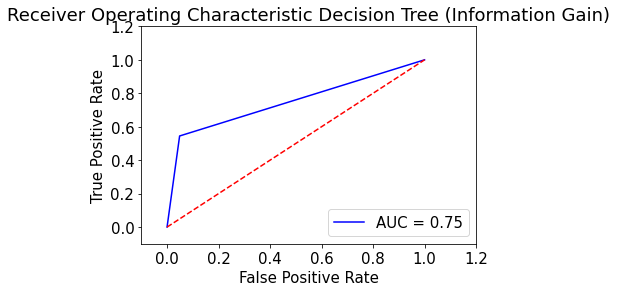

In [25]:
from sklearn.metrics import roc_curve, auc

## Gini Index

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_gini)
roc_auc_gini = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic Decision Tree (Gini Index)')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc_gini)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Information Gain
         
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_en)
roc_auc_en = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic Decision Tree (Information Gain)')
plt.plot(false_positive_rate, true_positive_rate, 'b',label= "AUC = %0.2f"% roc_auc_en)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Gini Coefficient for Decision Tree**

In [26]:
Gini_coefficient_gini=2*roc_auc_gini - 1
Gini_coefficient_en=2*roc_auc_en - 1
print("Gini_coefficient of both the Decision Tree classifier models are\n")
print ("Gini Index=",Gini_coefficient_gini)
print ("Information Gain=",Gini_coefficient_en)

Gini_coefficient of both the Decision Tree classifier models are

Gini Index= 0.4984695757831017
Information Gain= 0.495889773896


**MODEL 2 - RANDOM FOREST**

In [27]:
#random- forest


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
print ("\nAccuracy of the model is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value of the model is\n",classification_report(y_test,y_pred))

C:\Users\19293\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Accuracy of the model is  84.24608455317842 

Precision Value of the model is
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      7441
           1       0.71      0.58      0.64      2328

    accuracy                           0.84      9769
   macro avg       0.79      0.75      0.77      9769
weighted avg       0.84      0.84      0.84      9769



**Hyperparameters**

n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)


**Confusion Matrix for Random Forest Model**

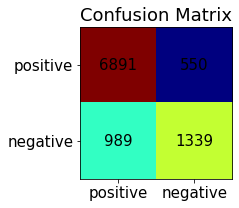

In [28]:
#confusion matrix

conf_arr =confusion_matrix(y_test,y_pred)


norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

**ROC and AUC Curve**

[0.        0.0739148 1.       ]
[0.         0.57517182 1.        ]
[2 1 0]
0.7506285124537542


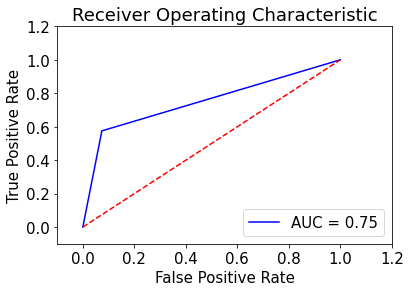

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Gini Coefficient for Random Forest**

In [30]:
Gini_coefficient_gini=2*roc_auc - 1
print("Gini_coefficient is\n", Gini_coefficient_gini)

Gini_coefficient is
 0.5012570249075083


In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


**MODEL 3 - SVM : SUPPORT VECTOR MACHINE**

In [32]:
#svm

from sklearn import svm, datasets

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = svm.SVC(kernel='rbf',decision_function_shape='ovr',max_iter=9000)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)


C:\Users\19293\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=9000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


**Accuracy and Precision of SVM Model**


Accuracy of the model is  85.30044016787798 

Precision Value of the model is
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7441
           1       0.77      0.55      0.64      2328

    accuracy                           0.85      9769
   macro avg       0.82      0.75      0.77      9769
weighted avg       0.85      0.85      0.84      9769



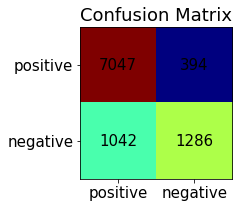

In [33]:
print ("\nAccuracy of the model is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value of the model is\n",metrics.classification_report(y_test,y_pred))
conf_arr =confusion_matrix(y_test,y_pred)


norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

**ROC and AUC Curve for SVM**

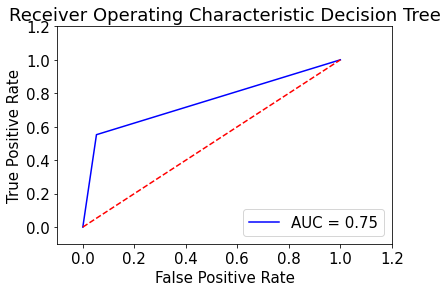

In [34]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Gini Coefficient for SVM**

In [35]:
Gini_coefficient_gini=2*roc_auc - 1
print("Gini_coefficient of both the Decision Tree classifier models are\n")
print("Gini Index=",Gini_coefficient_gini)

Gini_coefficient of both the Decision Tree classifier models are

Gini Index= 0.4994556259527989


**HYPERPARAMETER TUNING USING GRID SEARCH**

GridSearchCV helps us combine an estimator with a grid search preamble to tune hyper-parameters.

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

C:\Users\19293\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................


In [50]:
print(grid.best_estimator_)

AttributeError: ignored

**LOGISTIC REGRESSION PENALIZED BY LASSO**


In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken


In [ ]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)


**Performing K-Fold cross validation on the above models**

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Decision Tree','Random Forest','SVM']
models=[DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100),svm.SVC(kernel='rbf')]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

C:\Users\19293\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\19293\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**CONCLUSION**

DECISION TREE CLASSIFIER using GINI INDEX:

* Accuracy = 85.607
* AUC Value: 0.75
* Gini Coefficient = 0.498

DECISION TREE CLASSIFIER using ENTROPY:

* Accuracy = 85.43
* AUC Value: 0.75
* Gini Coefficient = 0.495

RANDOM FOREST CLASSIFIER

* Accuracy = 84.716
* AUC Value: 0.77
* Gini Coefficient = 0.53

SVM CLASSIFIER

* Accuracy = 85.3
* AUC Value: 0.75
* Gini Coefficient = 0.49



 * Is the relationship significant?

 Yes! Randomforest helped us in identifying the significant variables. We further validated the significance of these variables by getting a low p value in the OLS method and a high score (99%!) for the SVR.

* Are any model assumptions violated?

  Decision Tree:

  Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
Records are distributed recursively on the basis of attribute values.
Order to placing attributes as root or internal node of the tree is done by using some statistical approach. While using information Gain as a algorithm, we assume attributes to be categorical, and for gini index, attributes are assumed to be continuous.
At the beginning, the whole training set is considered as the root.

  Random Forest:

  At each step of building individual tree we find the best split of data
While building a tree we use not the whole dataset, but bootstrap sample
We aggregate the individual tree outputs by averaging (actually 2 and 3 means together more general bagging procedure).

  Support Vector Machine:

  Support vector machines consider that the features are independent and the data is identically distributed.


* Is there any multicollinearity in the model?

  Yes there is moderate multicollinearity in the model in the columns - education.num, hours.per.week, capital.gain, and age which was inferred from the correlation matrix and the pair plots.

* In the multivariate models are predictor variables independent of all the other predictor variables?

  The predictor variable 'income' in independent of all other predictor variables.

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

  Handles the less significant columns in the code above.

* Does the model make sense?

  Yes the model makes sense. We get nearly 86% accuracy with decision tree and the AUC value of 0.75 indicates a fair performing model as per evaluations.

* Does regularization help?

* Which independent variables are significant?

  capital.gain, age, hours.per.week and fnlwgt are the most signification features

* Which hyperparameters are important?

  For Decision Tree Classifier: max-depth
  The model stops splitting when the max depth is reached
  
  For Random Foresr Classfiier: n-estimators and min-sample-split

  For SVM: C and Gamma 





**REFERENCES**

Sckit learn offcial documentation
Machine Learning with scikit-learn Quick Start Guide - by Kevin Jolly
Refered Towards Data Science

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://towardsdatascience.com/implement-logistic-regression-with-l2-regularization-from-scratch-in-python-20bd4ee88a59


The algorithms were referred directly from the Sckit learn official documentation. Grid Search for hyperparameter training referred to towards dataScience.  The reaming code was written independently.

Copyright 2020 Gauri Verma

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.